In [6]:
#Initail EDA on wine quality datasets to use in my capstone project

In [7]:
#My initial two datasets come from UCI
#Explores wine quality and targets a score based on 11 features for Vinho Verde wine from northern Portugal
#Vinho Verde is most commonly a white wine, but there is also a rose or "red" Vinho Verde

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#read datafiles into pandas
white_vinho = pd.read_csv('winequality-white.csv', sep=';')
red_vinho = pd.read_csv('winequality-red.csv', sep=';')



In [10]:
#Explore and clean the white and red datasets
white_vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
white_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [12]:
#check for dupplicates, need to investigate
print(white_vinho.duplicated().sum())
print(red_vinho.duplicated().sum())

937
240


In [13]:
#show samples that are duplicated
#These duplicates should not be removed provided they represent unique independent observations, in other words
#two different wines (samples) could easily have the same physical properties (features) to discard them
#would potentially eliminate valuable information
white_vinho.loc[white_vinho.duplicated(keep=False), :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4855,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6
4879,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6


In [14]:
#check for missing values
print(white_vinho.isnull().sum())
print(red_vinho.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [15]:
#describe the data in the dataset
white_vinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [16]:
#relatively few wines score high or low
white_vinho['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


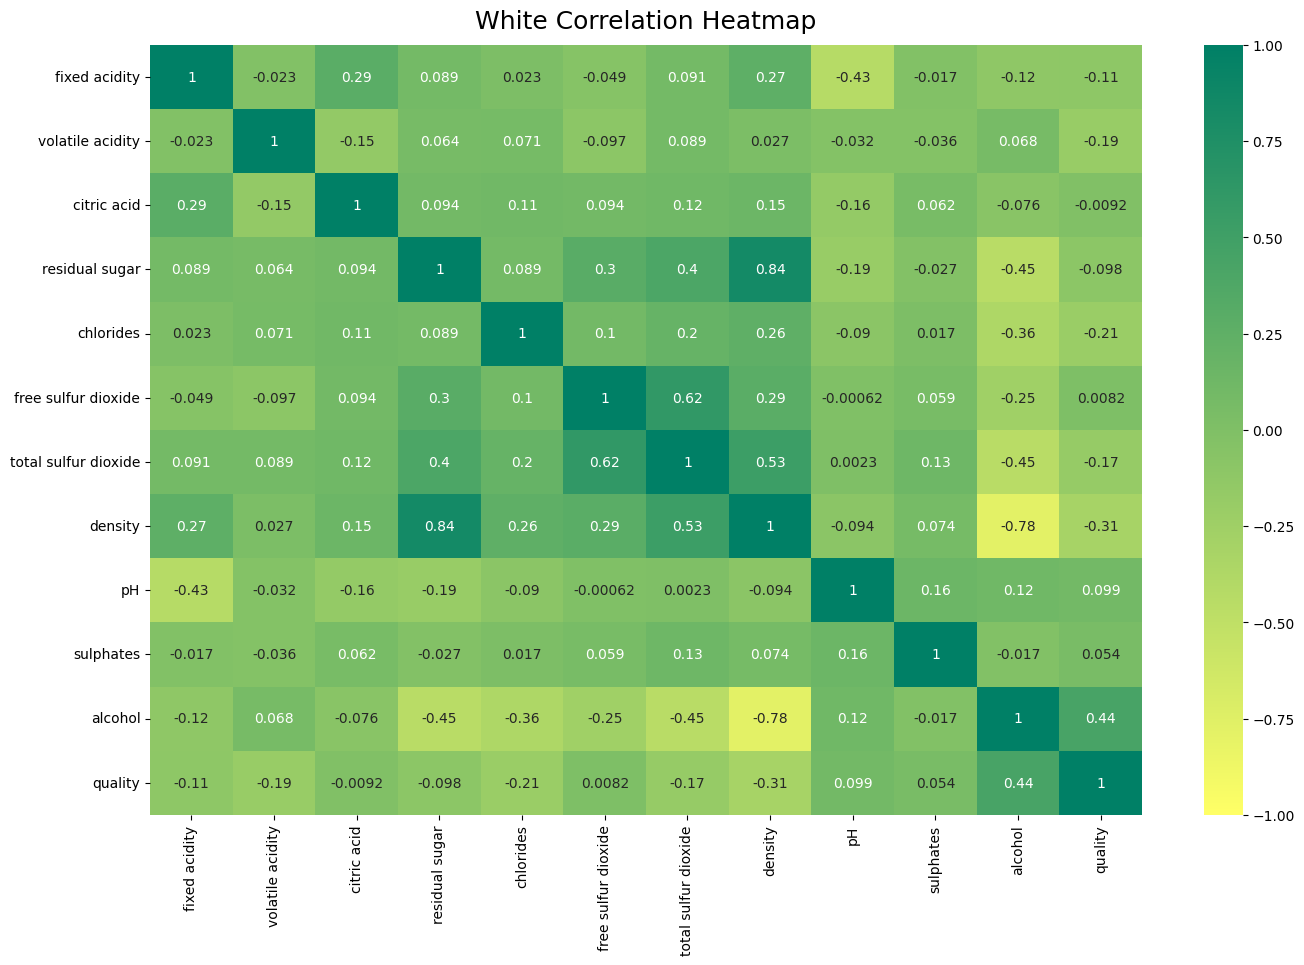

In [17]:
#Here we see quickly that white wine quality has a positive correlation mainly to 'alcohol', and lesser so
#to'sulphates', and 'ph',
#and a stronger negitive correlation to 'denisity', 'volatile acidity', 'fixed acidity', 'chlorides',


plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(white_vinho.corr(), vmin=-1, vmax=1, annot=True, cmap='summer_r')
heatmap.set_title('White Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('white_wine_heatmap.png', dpi=300, bbox_inches='tight')

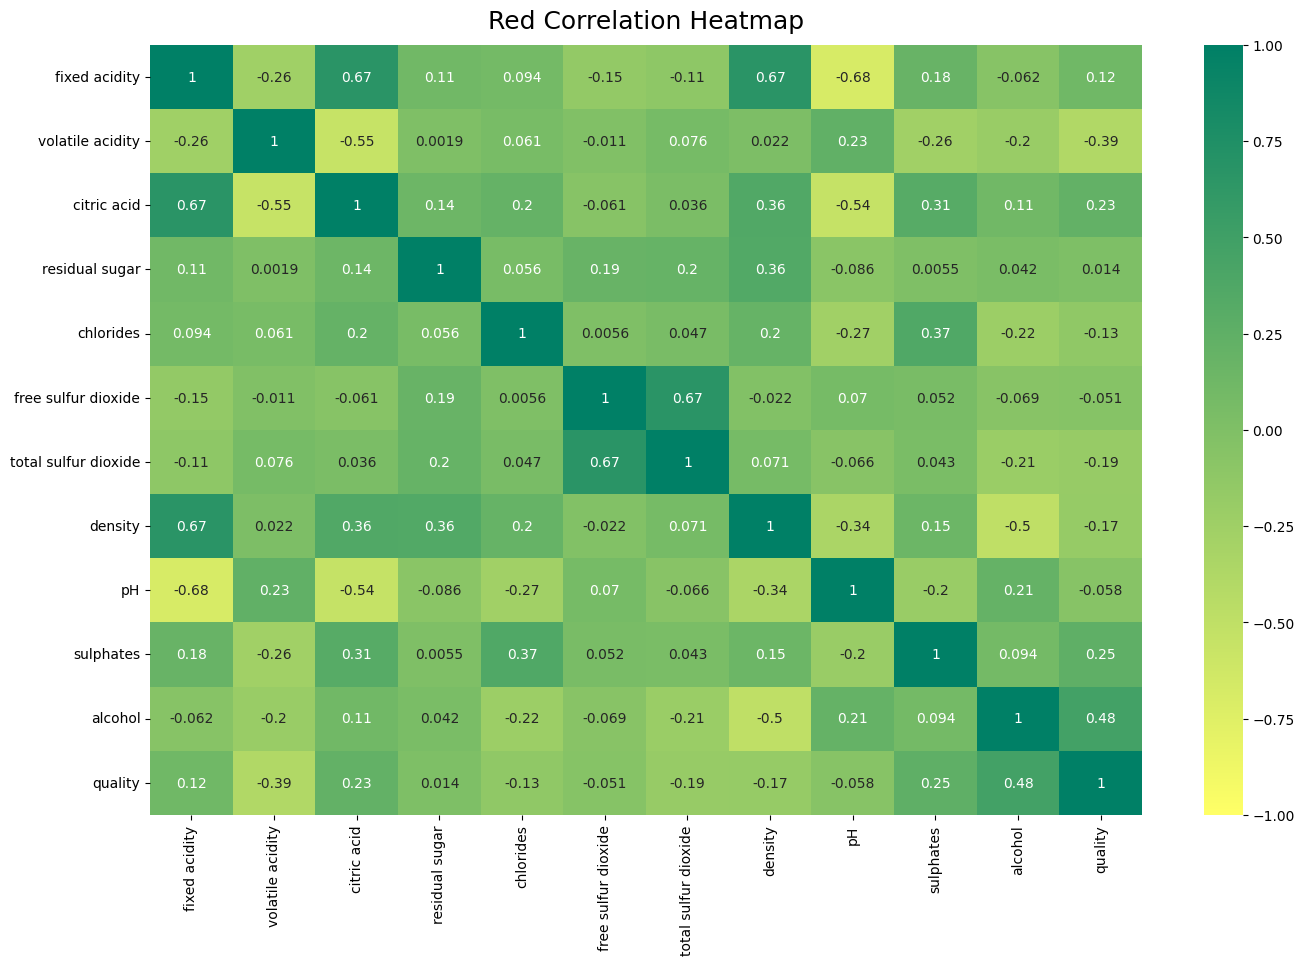

In [18]:
#Here we see quickly that red wine quality has a positive correlation to 'alcohol', 'sulphates',
#'residual sugar', 'citric acid', 'fixed acidity' and a stronger negitive correlation to 'volatile acidity'
#'total sulfer dioxide', 'density', 'chlorides'



plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(red_vinho.corr(), vmin=-1, vmax=1, annot=True, cmap='summer_r')
heatmap.set_title('Red Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('red_wine_heatmap.png', dpi=300, bbox_inches='tight')

In [19]:
#Based on heat map the red wine data in some ways looks more interesting in terms of complexity
red_vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
red_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
#max and min values are reasonable...no extreme values or outliers
red_vinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
#The red vinho wine has less samples as expected since vinho is generally white wine

red_vinho['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [23]:
#Both datasets are cleaned enough begin some preliminary modeling

In [24]:
#BUSINESS UNDERSTANDING:
#red_vinho dataset is clean and so now I can proceed to focus on the business question:
#Can I predict the wine quality score based on wine characteristics?
#Secondary question, how would this wine be judged in competition? (this may be a more difficult question and it
#has been challanging to find datasets that would allow me to correlate with judges decisions on class winners)

In [25]:
#RED WINE FOCUS: since I have more personal experience and preference toward red wine, I am going to focus
#initially on the red_vinho dataset.  I have more domain knowledge with reds and I also have friends with
#extensive domain knowledge I can tap into if needed at some point

In [26]:
#PRELIMINARY MODELING:
#It seems we could appraoch this two ways potentially
#We could view the 'quality' in terms of a predictive rating value (real number) using regression modeling
#Alternatively we could view the 'quality' as 1 of 9 classes
#I am starting with the regression approach to see how it performs and then will investigate the other now
#or possibly as I worked through the capstone project

In [27]:
#split dataset into X and y with 'quality' as the target
X_red = red_vinho.drop('quality', axis=1)
y_red = red_vinho['quality']

In [28]:
#look at X_red dataset
X_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [29]:
#split the data into train test datasets
from sklearn.model_selection import train_test_split
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)


In [30]:
#create a pipeline with standard scaling and first order liner regression model
#from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [31]:
#create Pipeline
red_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('model', LinearRegression())])


In [32]:
#fit red_pipe to the training data
red_pipe.fit(X_train_red, y_train_red)

Pipeline(steps=[('scaling', StandardScaler()), ('model', LinearRegression())])

In [33]:
#model predictions
y_pred_red = red_pipe.predict(X_test_red)

In [34]:
#measure MSE for the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_red, y_pred_red)

0.39002514396395493

In [35]:
#that gives us some basis for comparing with other models
#use GridSearchCV to further explore regression models
import numpy as np
from sklearn.model_selection import GridSearchCV

In [36]:
#GridSearch with SFS:
#given some features have a stronger influence on quality, I want to see how SFS with varying number of features
#affects the model
from sklearn.feature_selection import SequentialFeatureSelector
#import Polynomial transformer
from sklearn.preprocessing import PolynomialFeatures

In [37]:
#create SFS pipeline, degree 1
sfs_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias=False)),
    ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=11)),
    ('linreg', LinearRegression())])

In [38]:
#GridSearch SFS with degree 1 model
sfs_grid = GridSearchCV(sfs_pipe, param_grid={'selector__n_features_to_select': range(1, 11)}, cv=5,
                        scoring='neg_mean_squared_error')
sfs_grid.fit(X_train_red, y_train_red)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('selector',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=11)),
                                       ('linreg', LinearRegression())]),
             param_grid={'selector__n_features_to_select': range(1, 11)},
             scoring='neg_mean_squared_error')

In [39]:
#best number of features to for degree 1 (linear regression model)
sfs_grid.best_params_

{'selector__n_features_to_select': 7}

In [40]:
#which features were selected as best predictors of quality
sfs_grid.best_estimator_.named_steps['selector'].get_feature_names_out(X_train_red.columns)

array(['volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'], dtype=object)

In [41]:
#this is consistent with what I observed in the correlation plot above intuitively

In [42]:
#here are the full results of the GridSearch with degree 1 model
sfs_grid.cv_results_

{'mean_fit_time': array([0.10126047, 0.1855299 , 0.26333146, 0.33032193, 0.40038409,
        0.53039451, 0.4972959 , 0.5242208 , 0.54602404, 0.67425141]),
 'std_fit_time': array([0.00522867, 0.00953823, 0.00654462, 0.00558352, 0.01072629,
        0.07304266, 0.02163356, 0.00737032, 0.00864163, 0.08615628]),
 'mean_score_time': array([0.00231152, 0.00221052, 0.00208058, 0.00223064, 0.0020524 ,
        0.00249133, 0.00235848, 0.00203686, 0.00197239, 0.00479956]),
 'std_score_time': array([5.12626035e-04, 5.28290868e-04, 1.97120790e-04, 4.05809237e-04,
        1.36543267e-04, 7.43625792e-04, 4.54021181e-04, 2.21261402e-04,
        4.22482566e-05, 2.75346054e-03]),
 'param_selector__n_features_to_select': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'selector__n_features_to_select': 1},
  {'selector__n_features_to_select': 2},
  {'sel

In [43]:
#we see the test score is virtually the same as with the
sfs_grid.score(X_test_red, y_test_red)

-0.3912782138290928

In [44]:
#DEGREE 2 MODEL
#Let's see if the degree 2 model produces a better fit


In [45]:
sfs_pipe_2 = Pipeline([
    ('scaling', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=11)),
    ('linreg', LinearRegression())])

In [46]:
sfs_grid_2 = GridSearchCV(sfs_pipe_2, param_grid={'selector__n_features_to_select': range(1, 11)}, cv=5,
                        scoring='neg_mean_squared_error')
sfs_grid_2.fit(X_train_red, y_train_red)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('selector',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=11)),
                                       ('linreg', LinearRegression())]),
             param_grid={'selector__n_features_to_select': range(1, 11)},
             scoring='neg_mean_squared_error')

In [47]:
sfs_grid_2.best_params_


{'selector__n_features_to_select': 4}

In [48]:
#Degree 2 model optimizes on just 4 features and 3 physical properties of the red wine--
#'volatile acidity', 'sulphates', 'alcohol', 'sulphates^2'
poly_feature_names = sfs_grid_2.best_estimator_.named_steps['poly'].get_feature_names_out(X_train_red.columns)
sfs_grid_2.best_estimator_.named_steps['selector'].get_feature_names_out(poly_feature_names)

array(['volatile acidity', 'sulphates', 'alcohol', 'sulphates^2'],
      dtype=object)

In [49]:
sfs_grid_2.cv_results_

{'mean_fit_time': array([0.64974051, 1.356604  , 1.93153372, 2.85891399, 3.32791562,
        4.03859949, 4.69067173, 5.29611087, 5.92846155, 6.63400841]),
 'std_fit_time': array([0.01007284, 0.14610085, 0.02241664, 0.15305563, 0.15090932,
        0.15574247, 0.16049231, 0.17879872, 0.19106204, 0.22693779]),
 'mean_score_time': array([0.00237336, 0.00239582, 0.00245676, 0.00238523, 0.00212321,
        0.00252814, 0.00234208, 0.00237246, 0.00252166, 0.00284529]),
 'std_score_time': array([4.03122787e-04, 5.22931126e-04, 6.45099536e-04, 3.95983951e-04,
        3.50692902e-05, 4.60623964e-04, 2.46951041e-04, 2.34293655e-04,
        4.84251567e-04, 2.77323424e-04]),
 'param_selector__n_features_to_select': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'selector__n_features_to_select': 1},
  {'selector__n_features_to_select': 2},
  {'sel

In [50]:
#while the score is only slightly better than the degree 1 linear regression model, it is acheived with just 4 features
sfs_grid_2.score(X_test_red, y_test_red)

-0.390190374958013

In [51]:
#CLASSIFICATION MODEL

In [52]:
#explore decision tree classifier with 9 classes correspondinig the the quality
from sklearn.tree import DecisionTreeClassifier
dtree_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('classifier', DecisionTreeClassifier())])
dtree_pipe.fit(X_train_red, y_train_red)

Pipeline(steps=[('scaling', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

In [53]:
#dtree accuracy score
dtree_pipe.score(X_test_red, y_test_red)

0.546875

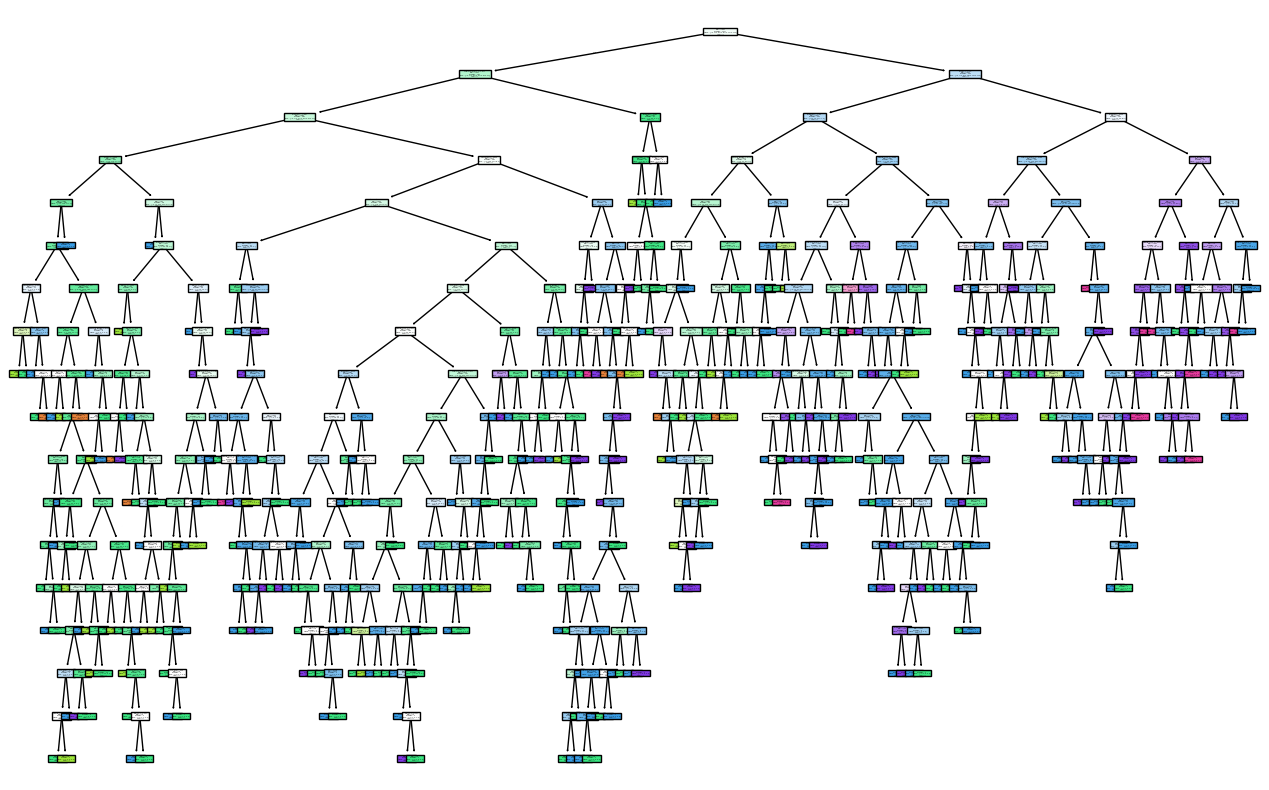

In [54]:
#graph the dtree
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 10))
plot_tree(dtree_pipe.named_steps['classifier'], feature_names=X_train_red.columns, class_names=[str(i) for i in sorted(y_train_red.unique())], filled=True)
plt.savefig('dtree_plot.png', dpi=300, bbox_inches='tight')

In [55]:
#explore Logistic Regression classifier configured for multi-class
from sklearn.linear_model import LogisticRegression
lrclass_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000))])
lrclass_pipe.fit(X_train_red, y_train_red)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaling', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, multi_class='auto'))])

In [56]:
#lgrclass accuracy score
lrclass_pipe.score(X_test_red, y_test_red)

0.575

In [57]:
#CONCLUSIONS:
#Need to further explore regr
#To answer secondary question need to find a bridge between scoring and how that relates to competition scoring
